In [81]:
import numpy as np
import torch
import warnings

warnings.filterwarnings(action='ignore')
torch.manual_seed(59)

### CIFAR Data

In [82]:
from torchvision import datasets

data_path = 'data\\cifar\\'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False)

Files already downloaded and verified


In [83]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [84]:
len(cifar10)

50000

In [85]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x173927D1C30>, 1, 'automobile')

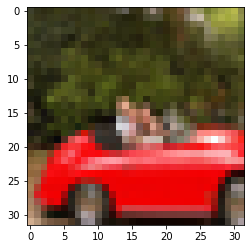

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img)
plt.show()

In [87]:
from torchvision import transforms

dir(transforms)

['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [88]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [89]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                                  transform=transforms.ToTensor())

In [90]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [91]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

The image is already scaled

In [92]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

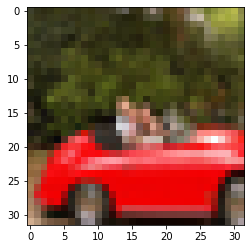

In [93]:
plt.imshow(img_t.permute(1, 2, 0))  # C x H x W -> H x W x C
plt.show()

In [94]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [95]:
imgs.view(3, -1).mean(dim=1)    # C x H x W -> C x H*W

tensor([0.4914, 0.4822, 0.4465])

In [96]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [97]:
transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [98]:
transformed_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                                       transform=transforms.Compose([
                                           transforms.ToTensor(),
                                           transforms.Normalize(
                                               (0.4914, 0.4822, 0.4465),
                                               (0.247, 0.2435, 0.2616)
                                           )
                                       ]))

transformed_cifar10_val = datasets.CIFAR10(data_path, train=False, download=False,
                                           transform=transforms.Compose([
                                               transforms.ToTensor(),
                                               transforms.Normalize(
                                                   (0.4914, 0.4822, 0.4465),
                                                   (0.247, 0.2435, 0.2616)
                                                   )
                                               ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


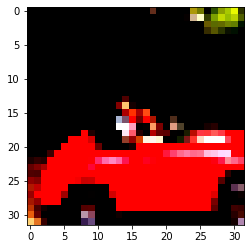

In [99]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()

### Birds & Airplanes

In [100]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']

cifar2 = [(img, label_map[label])
          for img, label in transformed_cifar10
          if label in (0, 2)]

cifar2_val = [(img, label_map[label])
              for img, label in transformed_cifar10_val
              if label in (0, 2)]

In [101]:
from torch import nn

n_out = 2
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out)
)

Softmax for output probabilities

In [102]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

x = torch.tensor([1.0, 2.0, 3.0])
softmax(x), softmax(x).sum()

(tensor([0.0900, 0.2447, 0.6652]), tensor(1.))

In [103]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [104]:
from torch import nn

n_out = 2
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out),
    nn.Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


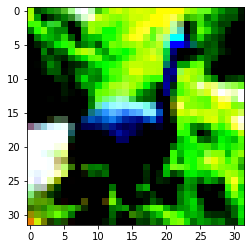

In [105]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [106]:
img_batch = img.view(-1).unsqueeze(0)
img_batch.shape

torch.Size([1, 3072])

In [107]:
out = model(img_batch)
out

tensor([[0.4595, 0.5405]], grad_fn=<SoftmaxBackward0>)

In [108]:
_, index = torch.max(out, dim=1)

index

tensor([1])

New loss - NLL (Negative-Log-Likelihood)

In [109]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out),
    nn.LogSoftmax(dim=1)
)

In [110]:
loss = nn.NLLLoss()

img, label = cifar2[0]
out = model(img.view(-1).unsqueeze(0))

loss(out, torch.tensor([label]))

tensor(1.0122, grad_fn=<NllLossBackward0>)

### Final model

In [111]:
from torch import nn, optim

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out),
    nn.LogSoftmax(dim=1)
)

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 10

for epoch in range(1, n_epochs + 1):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch: {epoch}, Loss: {loss:.4f}')

Epoch: 1, Loss: 8.5951
Epoch: 2, Loss: 0.7375
Epoch: 3, Loss: 3.0748
Epoch: 4, Loss: 1.7905
Epoch: 5, Loss: 6.2765
Epoch: 6, Loss: 8.4672
Epoch: 7, Loss: 10.9671
Epoch: 8, Loss: 8.0291
Epoch: 9, Loss: 10.9482
Epoch: 10, Loss: 5.8464


### DataLoader

In [114]:
from torch import nn, optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out),
    nn.LogSoftmax(dim=1)
)

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 100

for epoch in range(1, n_epochs + 1):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if epoch == 1 or epoch % 10 == 0:
        print(f'Epoch: {epoch}, Loss: {loss:.4f}')

Epoch: 1, Loss: 0.3536
Epoch: 10, Loss: 0.4798
Epoch: 20, Loss: 0.2055
Epoch: 30, Loss: 0.1145
Epoch: 40, Loss: 0.0566
Epoch: 50, Loss: 0.0449
Epoch: 60, Loss: 0.0457
Epoch: 70, Loss: 0.0399
Epoch: 80, Loss: 0.0348
Epoch: 90, Loss: 0.0229
Epoch: 100, Loss: 0.0113


In [115]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print(f'Accuracy: {correct / total:.4f}')

Accuracy: 0.8185


### More complex model

In [118]:
model = nn.Sequential(
    nn.Linear(3072, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2)
#     nn.LogSoftmax(dim=1)
)

loss_fn = nn.CrossEntropyLoss()

`nn.LogSoftmax` + `nn.NLLLoss` = `nn.CrossEntropyLoss`

In [119]:
numel_list = [p.numel()
              for p in model.parameters()
              if p.requires_grad == True]

sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

3.7 mln params...